# Listado inicial archivos

In [32]:
import os

DATA_PATH = './src/csv'
list(os.listdir(DATA_PATH))

['.DS_Store',
 'casos_hosp_uci_def_sexo_edad_provres.csv',
 'casos_diag_ccaadecl.csv']

- casos_hosp_uci_def_sexo_edad_provres.csv 
- casos_diag_ccaadecl.csv 

## casos_uci

1. Cargamos csv

In [36]:
DATA_PATH + '/' + list(os.listdir(DATA_PATH))[0]

'./src/csv/.DS_Store'

In [56]:
import pandas as pd

df_train = pd.read_csv(DATA_PATH + '/casos_hosp_uci_def_sexo_edad_provres.csv')

In [57]:
df_train.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


- provincia_iso
- sexo
- grupo_edad
- fecha
- num_casos
- num_hosp
- num_uci
- num_def

Comprobamos los valores disponibles por columna:

In [39]:
unique_values = {'columns': [], 'unique_len': [], 'unique_values': []}
for key in df_train.keys():
    unique_values['columns'].append(key)
    items = df_train[key].unique()
    unique_values['unique_values'].append(items)
    unique_values['unique_len'].append(len(items))

unique_df = pd.DataFrame(data=unique_values)
print('Valores únicos por columna:')
unique_df

Valores únicos por columna:


,columns,unique_len,unique_values
0,provincia_iso,53,"[A, AB, AL, AV, B, BA, BI, BU, C, CA, CC, CE, ..."
1,sexo,3,"[H, M, NC]"
2,grupo_edad,10,"[0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69..."
3,fecha,449,"[2020-01-01, 2020-01-02, 2020-01-03, 2020-01-0..."
4,num_casos,527,"[0, 1, 2, 4, 3, 5, 7, 6, 8, 9, 14, 18, 17, 15,..."
5,num_hosp,176,"[0, 1, 2, 4, 13, 9, 6, 3, 15, 7, 5, 11, 8, 17,..."
6,num_uci,32,"[0, 1, 2, 3, 6, 4, 8, 12, 11, 5, 9, 15, 14, 7,..."
7,num_def,79,"[0, 1, 2, 5, 4, 13, 7, 10, 3, 15, 12, 6, 25, 1..."


2. Comprobamos total de datos y datos únicos por paciente

In [40]:
print('Len total datos entrenamiento', len(df_train))

Len total datos entrenamiento 713910


3. Comprobamos datos no nulos

In [41]:
df_train.isnull().sum()

provincia_iso    13470
sexo                 0
grupo_edad           0
fecha                0
num_casos            0
num_hosp             0
num_uci              0
num_def              0
dtype: int64

Existen provincias con valor a null, vamos a eliminarlas

In [62]:
df_train['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [69]:
validas = ['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA']
mask_nan = df_train['provincia_iso'].isin(validas)
casos_hosp = df_train[mask_nan]

In [66]:
print('Len total datos entrenamiento', len(casos_hosp))

Len total datos entrenamiento 700440


In [116]:
print('Descripción datos por fecha')
df_fecha = casos_hosp.groupby('fecha').sum()
df_fecha.index[0]
df_fecha_graph = []
index = 0
columns = df_fecha.columns
for date in df_fecha.index:
    for col in columns:    
        row_by_date = []
        row_by_date.append(date)
        row_by_date.append(col)
        row_by_date.append(df_fecha[col][index])
        df_fecha_graph.append(row_by_date)
    index += 1

df_fecha_graph = pd.DataFrame(df_fecha_graph, columns=['fecha', 'num_tipo', 'total'])
df_fecha_graph

Descripción datos por fecha


,fecha,num_tipo,total
0,2020-01-01,num_casos,0
1,2020-01-01,num_hosp,9
2,2020-01-01,num_uci,0
3,2020-01-01,num_def,0
4,2020-01-02,num_casos,0
...,...,...,...
1791,2021-03-23,num_def,12
1792,2021-03-24,num_casos,3
1793,2021-03-24,num_hosp,1
1794,2021-03-24,num_uci,0


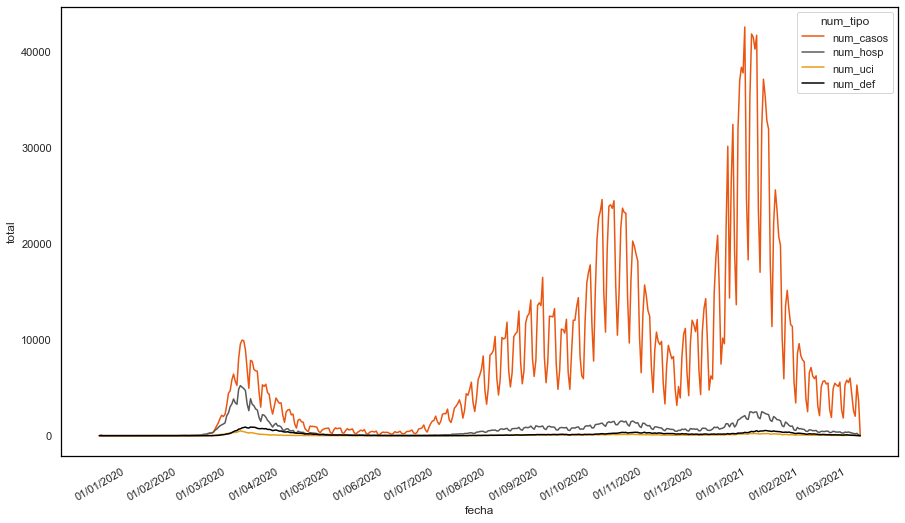

In [117]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates

df_fecha_graph.fecha = pd.to_datetime(df_fecha_graph.fecha)
sns.set(rc={'figure.figsize':(15,8.27), 'axes.facecolor': 'white', 'axes.edgecolor': 'black'})
ax = sns.lineplot(x="fecha", y="total", hue="num_tipo", data=df_fecha_graph, palette=["#ea5611", "#595959", "#e89d11", "#000000"])
xdates = pd.to_datetime(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'
                        , '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'
                        , '2021-01-01', '2021-02-01', '2021-03-01'])
ax.set(xticks=xdates)
ax.set_xticklabels(xdates, rotation=30)
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%Y"))
plt.show()

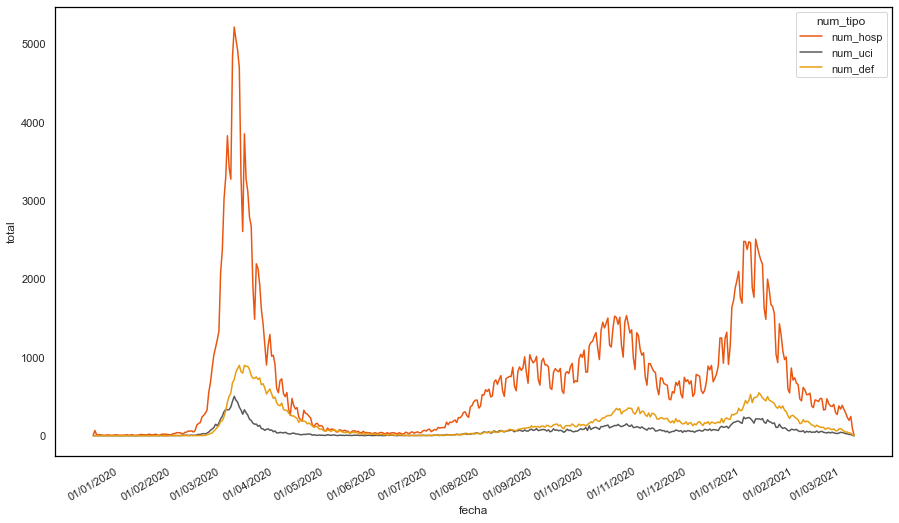

In [113]:
mask_nan = df_fecha_graph['num_tipo'] != 'num_casos'
df_fecha_graph_2 = df_fecha_graph[mask_nan]

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates

df_fecha_graph.fecha = pd.to_datetime(df_fecha_graph_2.fecha)
sns.set(rc={'figure.figsize':(15,8.27), 'axes.facecolor': 'white', 'axes.edgecolor': 'black'})
ax = sns.lineplot(x="fecha", y="total", hue="num_tipo", data=df_fecha_graph_2, palette=["#ea5611", "#595959", "#e89d11"])
xdates = pd.to_datetime(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'
                        , '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'
                        , '2021-01-01', '2021-02-01', '2021-03-01'])
ax.set(xticks=xdates)
ax.set_xticklabels(xdates, rotation=30)
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%Y"))
plt.show()


## Factores riesgo train csv: Edad, Sexo, Estado de fumador

### edad

In [103]:
casos_hosp_por_edad = casos_hosp.groupby('grupo_edad').sum()
casos_hosp_por_edad['num_graves'] = casos_hosp_por_edad['num_hosp'] + casos_hosp_por_edad['num_uci'] + casos_hosp_por_edad['num_def']
casos_hosp_por_edad

,num_casos,num_hosp,num_uci,num_def,num_graves
grupo_edad,,,,,
0-9,216278,1981,123,9,2113
10-19,341353,2294,157,17,2468
20-29,410241,7768,362,85,8215
30-39,436319,15807,1008,194,17009
40-49,534276,31262,2668,730,34660
50-59,476978,48119,5801,2556,56476
60-69,310403,57326,9092,6763,73181
70-79,208302,64291,7903,15675,87869
80+,237461,91229,1572,46535,139336


In [121]:
casos_hosp_por_edad = casos_hosp_por_edad.drop("NC")

Limpiamos los desconocidos

<AxesSubplot:xlabel='grupo_edad', ylabel='num_graves'>

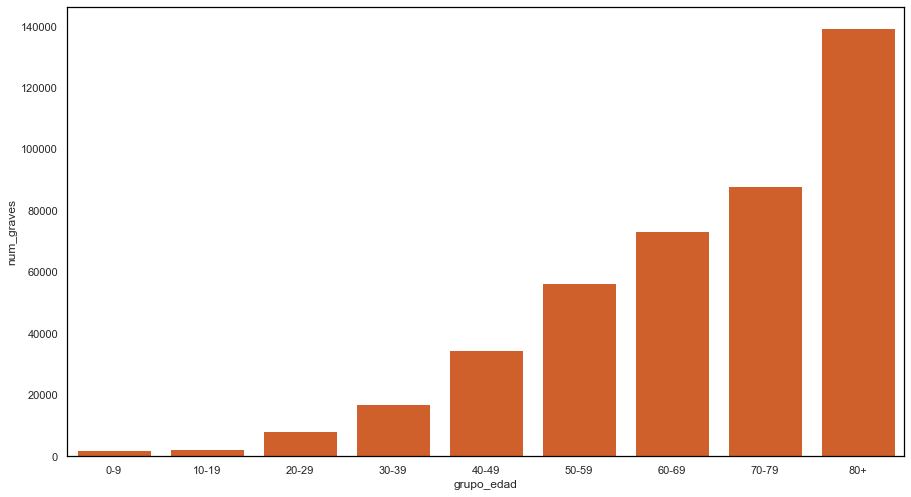

In [122]:
sns.set(rc={'axes.facecolor': 'white', 'axes.edgecolor': 'black'})
sns.barplot(x=casos_hosp_por_edad.index, y=casos_hosp_por_edad['num_graves'], palette=["#ea5611","#ea5611","#ea5611","#ea5611","#ea5611","#ea5611","#ea5611","#ea5611","#ea5611"])

In [161]:
total = casos_hosp_por_edad['num_graves'].sum()
print(total)
print('mas de 80', 139336 / total * 100)
print('mas de 70', 87869 / total * 100)

421327
mas de 80 33.07075027235378
mas de 70 20.855297666657965


### sexo

nos quedamos únicamente con los casos graves

In [132]:
casos_hosp_sex = casos_hosp
casos_hosp_sex['num_graves'] = casos_hosp_sex['num_hosp'] + casos_hosp_sex['num_uci'] + casos_hosp_sex['num_def']
is_gt0 = casos_hosp_sex['num_graves'] > 0
casos_hosp_sex = casos_hosp_sex[is_gt0]
casos_hosp_sex

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,num_graves
18,A,M,80+,2020-01-01,0,1,0,0,1
366,CO,H,60-69,2020-01-01,0,1,0,0,1
428,CS,H,80+,2020-01-01,0,1,0,0,1
517,GI,H,70-79,2020-01-01,0,1,0,0,1
675,J,M,50-59,2020-01-01,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
712275,Z,M,50-59,2021-03-23,9,1,0,0,1
712276,Z,M,60-69,2021-03-23,4,1,0,0,1
712277,Z,M,70-79,2021-03-23,6,2,0,0,2
712279,Z,M,NC,2021-03-23,15,1,0,0,1


In [133]:
is_H = casos_hosp_sex['sexo'] == 'H'
casos_hosp_sex_H = casos_hosp_sex[is_H]

is_M = casos_hosp_sex['sexo'] == 'M'
casos_hosp_sex_M = casos_hosp_sex[is_M]

por_sexo = [casos_hosp_sex_H.sum()['num_graves'], casos_hosp_sex_M.sum()['num_graves']]
por_sexo


[234879, 185113]

In [162]:
por_sexo / (por_sexo[0] + por_sexo[1]) * 100

array([59.15002024, 40.84997976])

<AxesSubplot:>

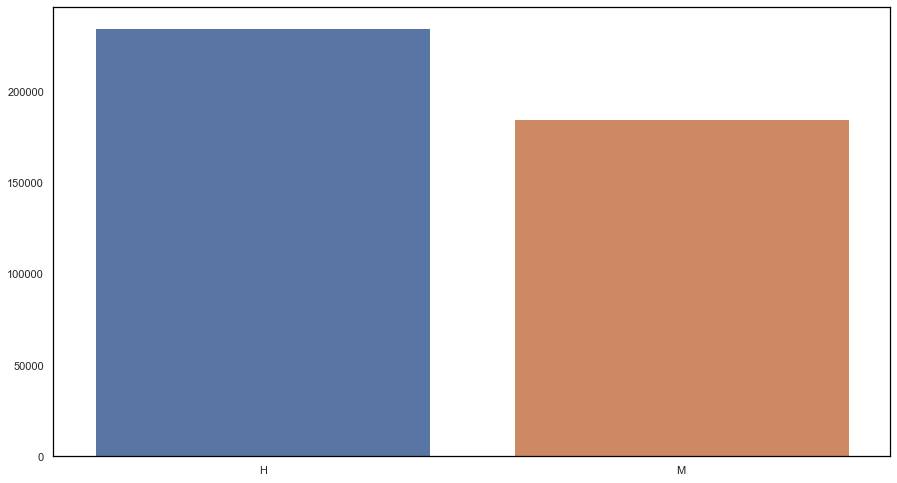

In [134]:

sns.barplot(y=por_sexo, x=['H', 'M'])

In [135]:
casos_hosp_sex = casos_hosp
casos_hosp_sex['num_graves'] = casos_hosp_sex['num_uci'] + casos_hosp_sex['num_def']
is_gt0 = casos_hosp_sex['num_graves'] > 0
casos_hosp_sex = casos_hosp_sex[is_gt0]

is_H = casos_hosp_sex['sexo'] == 'H'
casos_hosp_sex_H = casos_hosp_sex[is_H]

is_M = casos_hosp_sex['sexo'] == 'M'
casos_hosp_sex_M = casos_hosp_sex[is_M]

por_sexo = [casos_hosp_sex_H.sum()['num_graves'], casos_hosp_sex_M.sum()['num_graves']]
por_sexo

[59903, 41370]

In [163]:
por_sexo / (por_sexo[0] + por_sexo[1]) * 100

array([59.15002024, 40.84997976])

<AxesSubplot:>

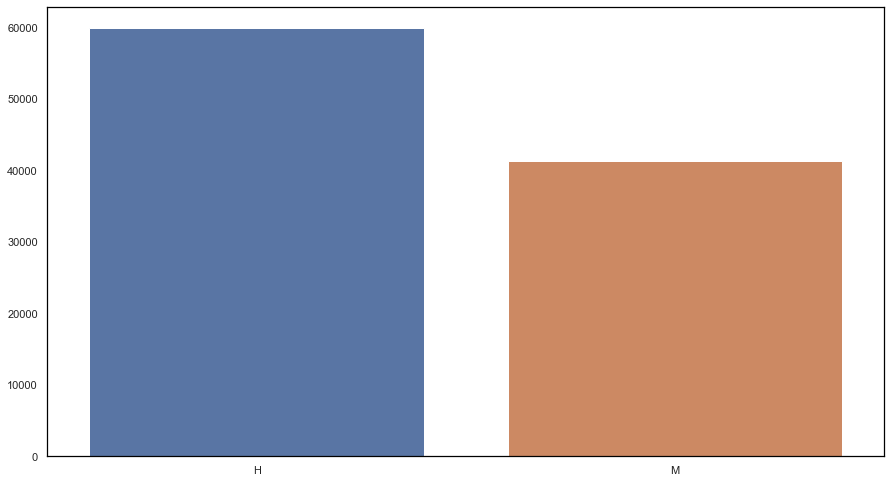

In [136]:
sns.barplot(y=por_sexo, x=['H', 'M'])

### edad vs sexo

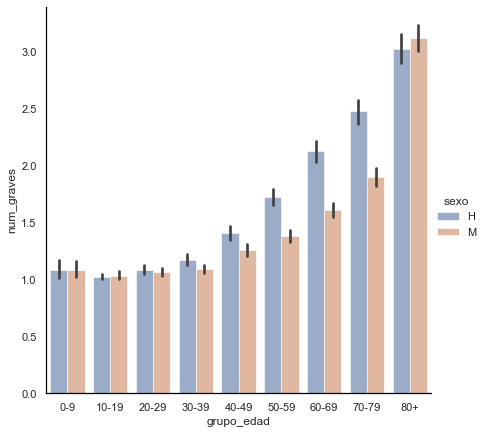

In [144]:
casos_hosp_sex = casos_hosp_sex.sort_values(by='grupo_edad')
nc = casos_hosp_sex['grupo_edad'] != 'NC'
casos_hosp_sex = casos_hosp_sex[nc]
nc = casos_hosp_sex['sexo'] != 'NC'
casos_hosp_sex = casos_hosp_sex[nc]

sns.catplot(
    data=casos_hosp_sex, kind="bar",
    x="grupo_edad", y="num_graves", hue="sexo",
    alpha=.6, height=6
)

## por provincias

In [154]:
por_provincias = casos_hosp.groupby('provincia_iso').sum()
por_provincias_sort = por_provincias.sort_values(by='num_graves', ascending=False)
por_provincias_sort

,num_casos,num_hosp,num_uci,num_def,num_graves
provincia_iso,,,,,
M,615002,91053,6655,14527,21182
B,388899,31922,2533,9409,11942
V,200054,17373,1492,3615,5107
A,143871,11773,1149,2643,3792
Z,78972,9440,873,2482,3355
BI,81990,8758,727,2179,2906
MU,108108,8722,1127,1550,2677
SE,103550,8508,791,1785,2576
TO,64322,5567,416,2064,2480


In [151]:
por_provincias = casos_hosp.groupby('provincia_iso').sum()
display(pd.DataFrame(data={
    'max_info': [por_provincias['num_graves'].max()],
    'min_info': [por_provincias['num_graves'].min()],
    'mean_info': [por_provincias['num_graves'].mean()]
}))

encima_media = por_provincias['num_graves'] > por_provincias['num_graves'].mean()
por_provincias_encima = por_provincias[encima_media]
por_provincias_encima = por_provincias_encima.sort_values(by='num_graves', ascending=False)
por_provincias_encima

,max_info,min_info,mean_info
0,21182,131,1958.326923


,num_casos,num_hosp,num_uci,num_def,num_graves
provincia_iso,,,,,
M,615002,91053,6655,14527,21182
B,388899,31922,2533,9409,11942
V,200054,17373,1492,3615,5107
A,143871,11773,1149,2643,3792
Z,78972,9440,873,2482,3355
BI,81990,8758,727,2179,2906
MU,108108,8722,1127,1550,2677
SE,103550,8508,791,1785,2576
TO,64322,5567,416,2064,2480


In [149]:
por_provincias[por_provincias['num_graves'] == 131]

,num_casos,num_hosp,num_uci,num_def,num_graves
provincia_iso,,,,,
CE,4998,299,38,93,131


In [157]:
total = por_provincias_sort['num_graves'].sum()
print(total)
madrid = 21182
barcelona = 11942
print('porcentaje madrid ', madrid / total * 100)
print('porcentaje barcelona ', barcelona / total * 100)

101833
porcentaje madrid  20.800722751956634
porcentaje barcelona  11.727043296377403


In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']
